# Analyse Incidence de la Varicelle

Première chose à faire c'est importer et inspecter les données avant de faire les questions et réponses. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os 
import isoweek

In [2]:
os.getcwd()
os.listdir()

['Analyse Incidence de la Varicelle.ipynb',
 '.DS_Store',
 'exercice_en.ipynb',
 'incidence-PAY-7.csv',
 'exercice.ipynb',
 'exercice_python_en.org',
 'exercice_python_fr.org',
 'exercice_R_en.org',
 'exercice_R_fr.org',
 '.ipynb_checkpoints',
 'exercice_fr.Rmd',
 'exercice_en.Rmd',
 'exercice_fr.ipynb']

In [3]:
#Since there is no missing line in the data we shall proceed
data = pd.read_csv("incidence-PAY-7.csv", skiprows=1)
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202036          7    904       77    1731       1           0   
1     202035          7    828        0    1694       1           0   
2     202034          7   2272      371    4173       3           0   
3     202033          7   1284      177    2391       2           0   
4     202032          7   2650      689    4611       4           1   
...      ...        ...    ...      ...     ...     ...         ...   
1548  199101          7  15565    10271   20859      27          18   
1549  199052          7  19375    13295   25455      34          23   
1550  199051          7  19080    13807   24353      34          25   
1551  199050          7  11079     6660   15498      20          12   
1552  199049          7   1143        0    2610       2           0   

      inc100_up geo_insee geo_name  
0             2        FR   France  
1             2        FR   France  
2             6        FR   France  
3             4        FR   France  
4             7        FR   France  
...         ...       ...      ...  
1548         36        FR   France  
1549         45        FR   France  
1550         43        FR   France  
1551         28        FR   France  
1552          5        FR   France  

[1553 rows x 10 columns]

In [4]:
#Checkin everything is good
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

## Data Wrangling to adapt to isoweek format

Since everything is good no data missing we can proceed to the wrangling

In [5]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [6]:
sorted_data = data.set_index('period').sort_index()

In [7]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

## Data Analysis 

<AxesSubplot:xlabel='period'>

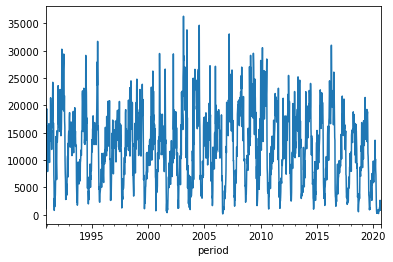

In [8]:
##Visual
sorted_data['inc'].plot()

<AxesSubplot:xlabel='period'>

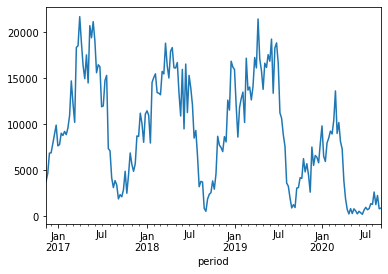

In [9]:
sorted_data['inc'][-200:].plot()

In [10]:
sorted_data.index[5]

Period('1991-01-07/1991-01-13', 'W-SUN')

In [11]:
## Determine the annual frequency

first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(sorted_data.index[0].year,
                                    sorted_data.index[-1].year)]

In [12]:
first_september_week

[Period('1990-08-27/1990-09-02', 'W-SUN'),
 Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('20

In [16]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    #print (one_year)
    print (len(one_year))
    #assert abs(len(one_year)-52) < 1
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

38
53
52
52
52
52
53
52
52
52
52
52
53
52
52
52
52
53
52
52
52
52
52
53
52
52
52
52
52


We can see that for the first year we have a biased estimate since we only have 38 weeks approximately...

So we shall not interpret the first annual incidence as "fiable"

<AxesSubplot:>

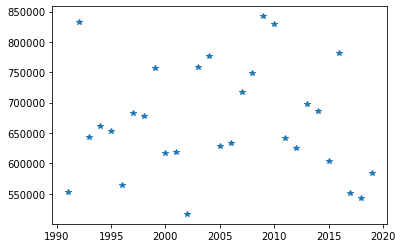

In [14]:
yearly_incidence.plot(style='*')

In [17]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1991    553090
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64